In [1]:
import numpy as np
import scipy.stats as stat
import matplotlib.pyplot as plt

### Random walk over $ \mathbb{Z}^2 $, a brief statistical summary

The concept of a random walk is very straightforward. Given some mathematical space, one may assign a probability function to every possible direction that could be defined from any given point in that particular space. The said function could be continuous or discrete, depending on the nature of the space in question. In any case, one can, then, generate a sequence of neighboring points by "throwing the dices", _i.e._ by mapping the defined probabilities (and its associated directions) to the outcome of a random event generator. To make things more clear, let us look to a classic scenario: a symmetric random walk over the two-dimensional square lattice, usually denoted as $ \mathbb{Z}^2 $.

In this particular context, from any given site we may lay on, there are four possible directions of movement: up, down, left or right. Let $\mathcal{A} = \left\lbrace U, D, L, R \right\rbrace$ be the set that formally represents all these possibilities. Well, if we want our random walk to be symmetric, then it's only reasonable to consider a fair $\#(\mathcal{A})$-sided dice to decide how we should perform each step. Here, as $\#(\mathcal{A}) = 4$, a fair [D4](https://en.wikipedia.org/wiki/Four-sided_die) will do the trick.

Rigorously, a symmetric random walk over $ \mathbb{Z}^2 $, with a fixed number $n$ of steps, is determined by the stochastic process $( S_{k} )_{k = 0}^{n}$, where $S_{0}$ denotes the initial site in our journey and, for $k \geq 1$, the next elements of the sequence are defined as $$ S_{k} = S_{0} + \sum_{\ell = 1}^{k} X_{\ell} \, ,$$ with $X_{\ell}$ being random vectors representing the directions in $\mathcal{A}$, following the distribution of a fair 4-sided dice. Hence, given any $x \in \mathcal{A}$, one has $\mathbb{P}(X_{\ell} \equiv x) = 1/4$.

In [2]:
def D4():
    return np.random.randint(0,4)

def step(roll, x, y):
    if (roll == 0):
        x += 1
    elif (roll == 1):
        y += 1
    elif (roll == 2):
        x -= 1
    else:
        y -= 1
    
    return [x,y]

def walk(N, x_arr, y_arr):
    x_arr = [0]
    y_arr = [0]
    
    for lil_step in range(0, N):
        dice_roll = D4()
        new_pos = step(dice_roll, x_arr[lil_step], y_arr[lil_step])
        x_arr.append(new_pos[0])
        y_arr.append(new_pos[1])
        
    return x_arr, y_arr

Now that we have defined all the auxiliary functions, one can easily simulate the random walks, looking up to their visual "fingerprints" and being able to start understanding its behavior. With that said, considering walks with $n = 10000$ steps, let us generate a few plots!

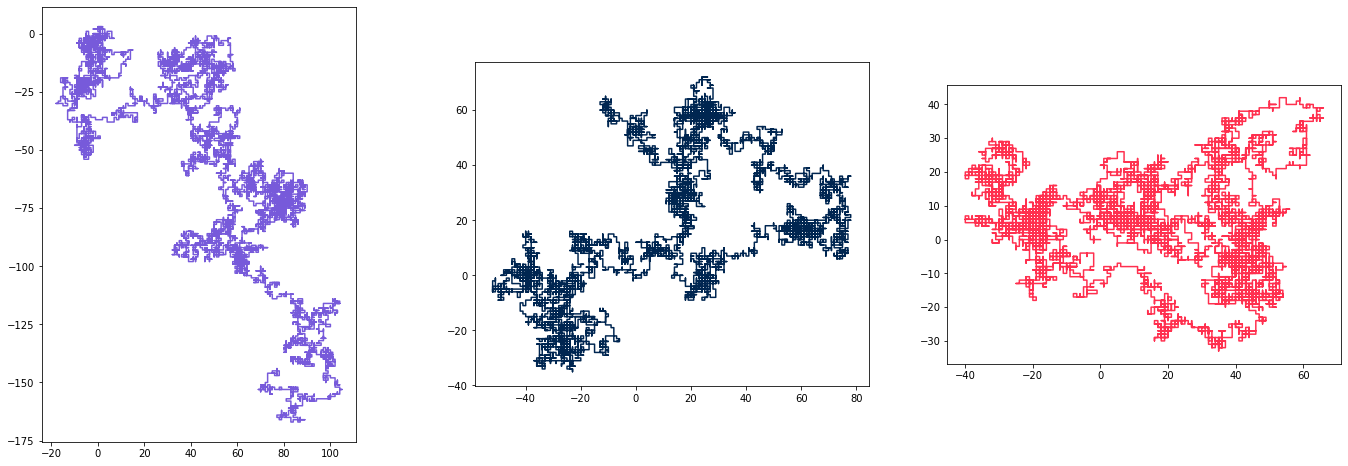

In [4]:
fig, axs = plt.subplots(1, 3, figsize = (24,8))
color_array = ['#775ada', '#002651', '#ff304f']

for path in range(0, 3):
    X = []
    Y = []
    num_steps = 10000

    drunk_guy = walk(num_steps, X, Y)
    X = drunk_guy[0]
    Y = drunk_guy[1]
    
    axs[path].plot(X, Y, color = color_array[path])
    axs[path].set(aspect = 1)

plt.show()

From the above we can see that, in fact, there is a characteristic visual profile. However, there is not a clear pattern. In the first case (purple), one is able to observe that the walk reached places really far from the origin, which will always be our starting point. The other two curves came out a little bit more constrained with respect to the first one, not going "that far" from $S_{0}$. This actually can be inferred from the details of the plot, since one can easily see the unit steps in the red walk but not (so easily) in the purple one.

Ok, let us stick with the third random walk. Maybe looking at the marginal distributions of its visited sites will do us good.

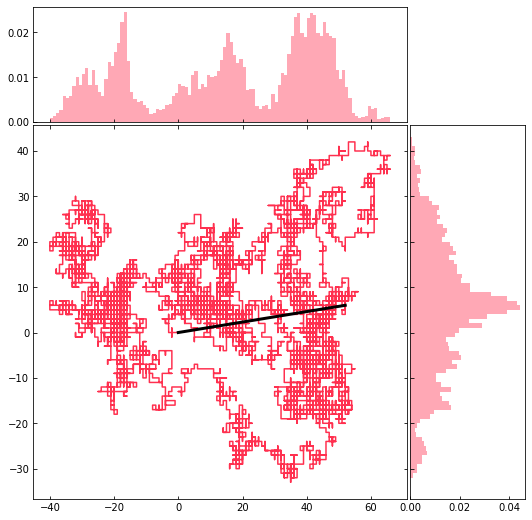

In [8]:
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

walk_box = [left, bottom, width, height]
xVisitHist_box = [left, bottom + height + spacing, width, 0.2]
yVisitHist_box = [left + width + spacing, bottom, 0.2, height]

plt.figure(figsize=(8, 8))

ax_walk = plt.axes(walk_box)
ax_walk.tick_params(direction = 'in', top = True, right = True)
ax_xVisitHist = plt.axes(xVisitHist_box)
ax_xVisitHist.tick_params(direction = 'in', labelbottom = False)
ax_yVisitHist = plt.axes(yVisitHist_box)
ax_yVisitHist.tick_params(direction = 'in', labelleft = False)

ax_walk.plot(X, Y, color = color_array[2])
ax_walk.plot([X[0], X[num_steps]], [Y[0], Y[num_steps]], color = 'k',
                linestyle = '-', linewidth = 3)


binwidth = 1
lim = np.ceil(np.abs([X, Y]).max() / binwidth) * binwidth
bins = np.arange(-lim, lim + binwidth, binwidth)

ax_xVisitHist.hist(X, bins = bins, color = '#ffa8b5', density = True) # or color = 'salmon', maybe
ax_yVisitHist.hist(Y, bins = bins, color = '#ffa8b5', orientation = 'horizontal', density = True)

ax_xVisitHist.set_xlim(ax_walk.get_xlim())
ax_yVisitHist.set_ylim(ax_walk.get_ylim())

plt.show()

The marginal distributions of visited sites on the lattice, which simply represents the distributions for each of its coordinates, does not appear to be something trivial; after all, it is a stochastic process. These marginal behaviors for the red walk are clearly distinct from what one would expect, for instance, of the purple walk, which is more 'elongated' over the $y$-axis. Besides that, note that we are simulating _symmetric_ random walks, so, the marginal distributions of visited sites should, <i>conceptually</i>, be the same from a statistical perspective, even though they appear to differ for a particular generated walk.

⭐️ <i> We could verify that such statement is, in fact, true, by simulating several random walks with the same number of steps, keeping the records of all visited sites in every curve, and, then, plotting the marginal histograms for the accumulated data. I did that in advance, for a thousand walks with $n = 10000$, and you can see the result [here](dist_visitedCoord.png). </i> 

Taking all these obstacles into account, it is better to boil down the nature of any random walk into a clever random variable. Given any random sequence $( S_{k} )_{k = 0}^{n}$, after a finite number $n$ of steps, the most natural question would be the following: <i> on average, how far from the starting point we end up? </i> Well, now enters the black line presented on the plot. 

The solid line connects the initial and final sites of the walk; respectively, $S_{0}$ and $S_{n}$. Hence, its length, which we are going to denote by $R$, actually provides us with a suitable candidate of such variable of interest. Therefore, if $d(A, B)$ represents the Euclidean distance between points $A$ and $B$, then one defines $R := d(S_{0}, S_{n})$. Moreover, since $S_{n}$ is a random variable, then $R$ will also be.

After all the discussion, we can then proceed to generate a lot of ($K = 1000$) random walks with $n = 10000$. For each one of them, the corresponding values of $R^2$ will be calculated and stored into the array <code>records_squaredR</code>. The recorded values for $R$ itself are going to be kept in <code>records_radius</code>.

In [3]:
K = 1000
num_steps = 10000
records_squaredR = []

for travel in range(0, K):
    X = []
    Y = []
    
    drunk_guy = walk(num_steps, X, Y)
    X = drunk_guy[0]
    Y = drunk_guy[1]

    squared_radius = (X[num_steps] - X[0])**2 + (Y[num_steps] - Y[0])**2
    records_squaredR.append(squared_radius)
    
records_radius = np.sqrt(records_squaredR)

With those outcomes in hand, let us calculate the average resulting distance $\langle R \rangle$, the square root of the average resulting distance squared $\sqrt{\langle R^2 \rangle}$ and the square root of $n$, in order to compare these numbers.

In [4]:
print(r"<R> = " + str(np.average(records_radius)))
print(r"√<R²> = " + str(np.sqrt(np.average(records_squaredR))))
print(r"√n = " + str(np.sqrt(num_steps)))

<R> = 89.507506040709
√<R²> = 100.97157025618647
√n = 100.0


So, from these results, we cannot relate $\langle R \rangle$ directly as a function of $n$; at least, it does not appear to be that straightforward. However, we probably have enough statistics to be certain about something: the square root of the number of steps must be greater than the expected value of the resulting distance, <i> i.e. </i> $$ \langle R \rangle < \sqrt{n} \, .$$

On the other hand, as a surprisingly amusement of the <i>stochastic gods</i>, one finds out that $ \sqrt{\langle R^2 \rangle} \simeq \sqrt{n} $. Equivalently, we can say that the average distance squared $\langle R^2 \rangle$ for the two-dimensional random walk over the square lattice is _probably_ equal to the number of steps $n$.

Of course, it is important to understand that those numerically computed values are not a proof for such claims, but rather some sort of statistical "evidence".

Let us take a step further and, now, look up to the histograms of $R^2$ and $R$, revealing the effective distributions of those random variables.

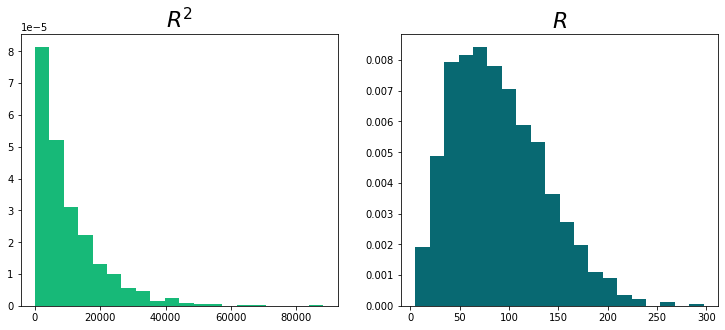

In [13]:
fig, axs = plt.subplots(1, 2, figsize = (12.5, 5))

axs[0].hist(records_squaredR, bins = 20, color = '#17b978', density = True)
axs[1].hist(records_radius, bins = 20, color = '#086972', density = True)
axs[0].set_title("$R^2$", size = 22)
axs[1].set_title("$R$", size = 22)

plt.show()

Based upon the perspective of probability densities, both cases allow us to infer one thing: for an arbitrary symmetric random walk with finite number of steps, we will probably end up in a site that is relatively close to $S_{0}$, but not _that_ close. On that matter, we could get some insights from the $R$ histogram, which presents a clear region, between the values close to the $50$ and $100$ ticks, of the highest probability density.

But, what is the <i> exact </i> probability distribution followed by $R$? It must have support on $\mathbb{R}^{+}$, obviously. 

From the histogram picture, some possibilities come to mind: $\chi^2$ (maybe with $2$ or $3$ degrees of freedom), Maxwell-Boltzmann, Gamma (with $\alpha = 2 \text{ or } 3$), Rayleigh... I will stop right here. 

In order to decide between these four, we are going to apply a particular test for comparing distributions: <i>QQ-plots</i>. This method, however, is only *visual*. Thus, to make our analysis a little bit more robust, following [Carlo Lemos](https://vitaliset.github.io/covariate-shift-1-qqplot/), we are also going to implement certain numerical metrics for the comparison: the mean square error (MSE) and the mean absolute error (MAE). 

In [14]:
# we now define the quantile functions (inverses of CDFs) for the above probability distributions
string_testFunc = ["Chi-squared ($k = 3$)", "Maxwell-Boltzmann", 
                   r"Gamma ($\alpha = 2$)", "Rayleigh"]

def quantilTest(x, func_label):
    if (func_label == 0):
        return stat.chi2.ppf(x, 3, loc = 0, scale = 1)
    elif (func_label == 1):
        return stat.maxwell.ppf(x, loc = 0, scale = 1)
    elif (func_label == 2):
        return stat.gamma.ppf(x, 2, loc = 0, scale = 1)
    else:
        return stat.rayleigh.ppf(x, loc = 0, scale = 1)

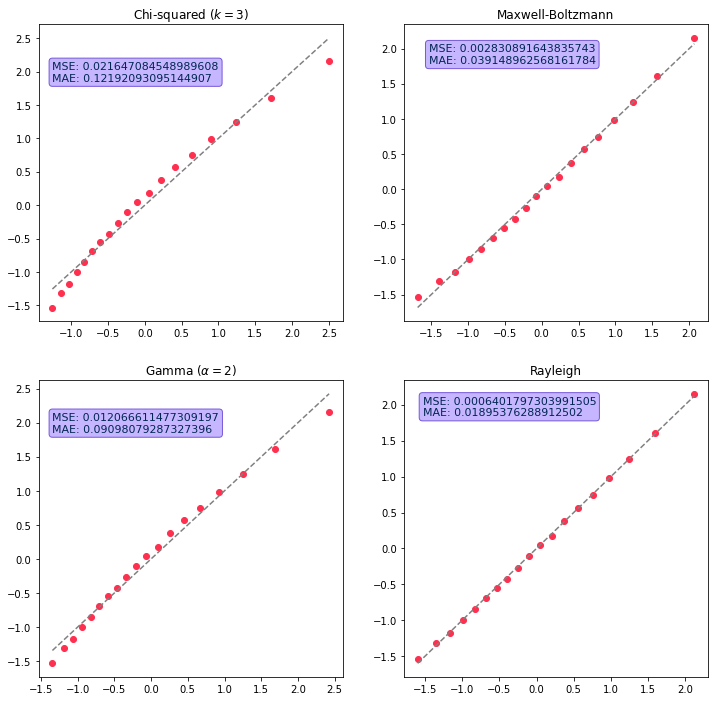

In [15]:
sorted_recordsR = np.sort(records_radius)

fig, axs = plt.subplots(2, 2, figsize = (12, 12))
coords_axs = [(0,0), (0,1), (1,0), (1,1)]

k = 20
alpha_values = np.arange(float(1)/k, 1, float(1)/k)
quantiles_indexes = np.floor(len(records_radius) * alpha_values) + 1

qEmpir = []
for index in quantiles_indexes:
    index = int(index)
    qEmpir.append(sorted_recordsR[index])

standard_qEmpir = (qEmpir - np.mean(qEmpir)) / np.std(qEmpir)

for pair in coords_axs:
    label = (2 * pair[0]) + pair[1]
    qTheor = quantilTest(alpha_values, label)
    standard_qTheor = (qTheor - np.mean(qTheor)) / np.std(qTheor)
    
    MSE = np.mean(np.power((standard_qEmpir - standard_qTheor), 2))
    MAE = np.mean(np.abs(standard_qEmpir - standard_qTheor))
    
    true_minmax = np.min([np.max(standard_qEmpir), np.max(standard_qTheor)])
    true_maxmin = np.max([np.min(standard_qEmpir), np.min(standard_qTheor)])
    
    metrics_textbox = axs[pair].text(true_maxmin, true_minmax, 
                                     "MSE: " + str(MSE) + "\n" + "MAE: " + str(MAE), 
                                     color = '#002651', size = 11, rotation = 0,
                                     ha = "left", va = "top",
                                     bbox = dict(boxstyle = "round", 
                                                 ec = "#775ada", 
                                                 fc = "#c6b5ff")
                                    )

    axs[pair].plot(standard_qTheor, standard_qTheor, color = 'gray', linestyle = '--')
    axs[pair].scatter(standard_qTheor, standard_qEmpir, color = '#ff304f')
    axs[pair].set_title(string_testFunc[label])
    
plt.show()

Right away, we can see that $R$ does not follow the chi-squared or the gamma distributions; at least for the chosen parameters. In fact, a more careful (and <i>rightful</i>) approach would require to test our data with those same distributions again, several times, looking for an optimal adjustment with respect to the parameters that alter their corresponding probability functions. However, to make the current discussion more fluid, I kindly ask you some sort of "suspension of disbelief". 😉

Now, for the remaining options, the QQ-plot itself cannot be used, alone, as a visual test to determine the best candidate, although we can observe, with a bit of will, that the Maxwell-Boltzmann distribution does not perform so well, especially on the first two quantiles. In any case, aided by the numerical metrics, the MSE and the MAE, we are able to <i>slam the gavel down</i>. The MAE for the comparison with the Rayleigh distribution is approximately half of the MAE for the Maxwell case. Moreover, with respect to the MSE, the Rayleigh's result is significantly lower than the Maxwell's one. 

Hence, we have reached the conclusion that $R$ follows a Rayleigh distribution.

Plotting the histogram density of our recorded values for $R$ together with the probability density function of the Rayleigh distribution yields the figure below.

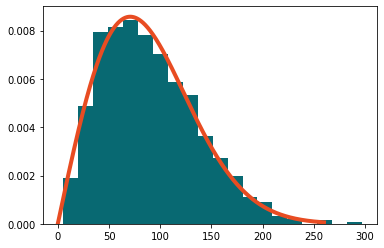

In [16]:
rads = np.arange(0, 260, 0.1)
rayleighDist = 2 * (rads/num_steps) * np.exp(-np.power(rads,2) / num_steps)

plt.hist(records_radius, bins = 20, color = '#086972', density = True)
plt.plot(rads, rayleighDist, color = '#e84c22', linewidth = 4)
plt.show()

This is really nice. 😊 